In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab import files
from google.colab import drive
from tensorflow.keras.preprocessing.image import load_img
import os
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.backend import batch_normalization
from tqdm.notebook import tqdm

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alekseyraev","key":"bb5ea560abd2d0d0a0bc27b4e0bb03d7"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! kaggle datasets download lizhecheng/mushroom-classification/code

100% 1.07G/1.07G [00:43<00:00, 32.7MB/s]
100% 1.07G/1.07G [00:43<00:00, 26.4MB/s]


In [ ]:
! unzip  /content/mushroom-classification.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: archive/Mushrooms/Boletus/0622_axDS6XbWq14.jpg  
  inflating: archive/Mushrooms/Boletus/0623_rGwoTDghdAY.jpg  
  inflating: archive/Mushrooms/Boletus/0624_RmlDHXvJUeU.jpg  
  inflating: archive/Mushrooms/Boletus/0625_zqKe97TlLiA.jpg  
  inflating: archive/Mushrooms/Boletus/0626_Vr79bfyR04Q.jpg  
  inflating: archive/Mushrooms/Boletus/0627_eN6cXmAY_WM.jpg  
  inflating: archive/Mushrooms/Boletus/0628_HgADwtCnaLg.jpg  
  inflating: archive/Mushrooms/Boletus/0629_vlmH59caIwg.jpg  
  inflating: archive/Mushrooms/Boletus/0630_dhxHhToh_80.jpg  
  inflating: archive/Mushrooms/Boletus/0631_PJXNFQZc7n8.jpg  
  inflating: archive/Mushrooms/Boletus/0632_Rc_3hYDbYqU.jpg  
  inflating: archive/Mushrooms/Boletus/0633_0hFXcQuG57k.jpg  
  inflating: archive/Mushrooms/Boletus/0634_T00gs2bFUuQ.jpg  
  inflating: archive/Mushrooms/Boletus/0635_-J_6XTsYZMA.jpg  
  inflating: archive/Mushrooms/Boletus/0636_t538mfIEbis.jpg  
  

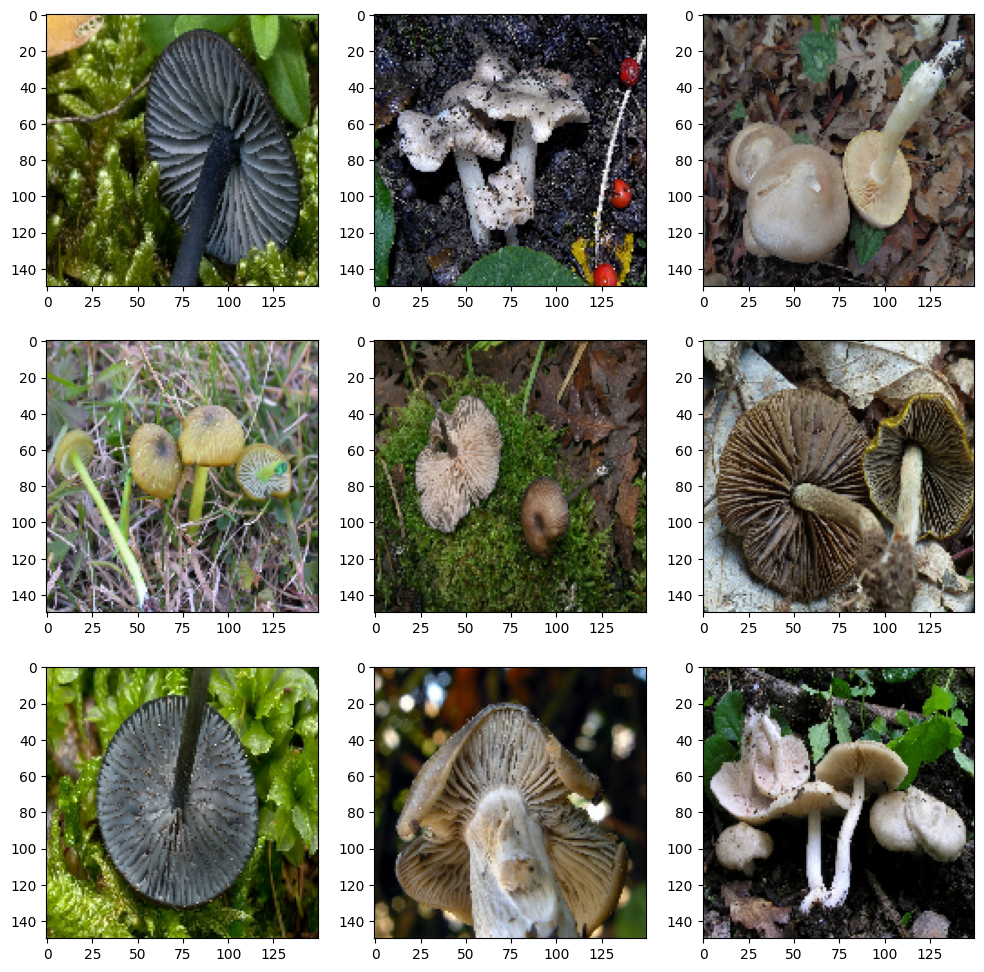

In [ ]:
## plot some images
typo = 'Entoloma'
picture_size = 150
plt.figure(figsize = (12,12))
for i in range(1,10,1):
  plt.subplot(3,3,i)
  img = load_img('/content/archive/' + 'Mushrooms/' + typo + '/' + os.listdir('/content/archive/'+ 'Mushrooms/' + typo)[i],target_size = (picture_size,picture_size))
  plt.imshow(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 124
base_path = "/content/archive/"
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "Mushrooms",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "Mushrooms",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 6714 images belonging to 9 classes.
Found 6714 images belonging to 9 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(1024,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(1024,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(9,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        12352     
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 256)       3145984   
                                                                 
 batch_normalization_7 (Batc  (None, 25, 25, 256)     

In [ ]:
model = Sequential()
model.add(Conv2D(64,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(64,3),padding='same',input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(9,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        12352     
                                                                 
 batch_normalization_12 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 256)       3145984   
                                                                 
 batch_normalization_13 (Bat  (None, 25, 25, 256)     

In [ ]:
epochs = 20
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.003),
              metrics=['accuracy'])



history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                )

<ipython-input-15-8fd29071d86e>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
54/54 [==============================] - 172s 3s/step - loss: 2.1573 - accuracy: 0.2308 - val_loss: 5.8513 - val_accuracy: 0.1714
Epoch 2/20
54/54 [==============================] - 165s 3s/step - loss: 2.0559 - accuracy: 0.2640 - val_loss: 2.0655 - val_accuracy: 0.2386
Epoch 3/20
54/54 [==============================] - 176s 3s/step - loss: 2.0258 - accuracy: 0.2722 - val_loss: 2.0566 - val_accuracy: 0.2491
Epoch 4/20
54/54 [==============================] - 175s 3s/step - loss: 1.9966 - accuracy: 0.2775 - val_loss: 1.9273 - val_accuracy: 0.2849
Epoch 5/20
54/54 [==============================] - 165s 3s/step - loss: 1.9548 - accuracy: 0.2933 - val_loss: 2.0723 - val_accuracy: 0.2443
Epoch 6/20
54/54 [==============================] - 175s 3s/step - loss: 1.9381 - accuracy: 0.3058 - val_loss: 2.0212 - val_accuracy: 0.2627
Epoch 7/20
54/54 [==============================] - 176s 3s/step - loss: 1.9131 - accuracy: 0.3191 - val_loss: 2.1965 - val_accuracy: 0.2062
Epoch 8/20
54

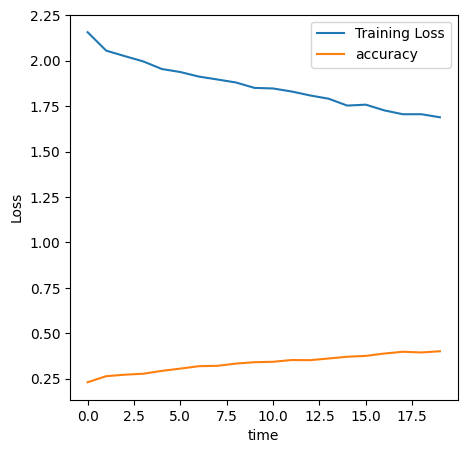

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('time')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.legend()
plt.show()